# <font color='orange'>Clustering: KMeans
--- 
</font>

*@ Jorge Alberto Tovar Jiménez*

Es un algoritmo que agrupa los datos basándose en las similitudes que encuentra entre un elemento y otro. Se debe indicar la cantidad de grupos que se desean (`K`). Es un algoritmo iterativo que con cada iteración define de mejor manera cada uno de los grupos.

Debido a que los `centroides` de cada grupo se ubican de manera "aleatoria" la primera vez, puede llegar a generar grupos diferentes cada vez que se ejecute el algoritmo.

Problema: Agrupar a los clientes de una empresa según sus características.

Librerías:

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

DataFrame:

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,edad,genero,nivel_ingresos,estudios,total_empleos
0,19,1,1,0,1
1,18,0,0,0,0
2,29,1,3,2,2
3,25,1,2,1,1
4,27,0,2,1,3


Crear nArray:

In [3]:
X = df.values

Crear modelo:

In [4]:
KM = KMeans(init='k-means++', n_clusters=4, n_init=10)

Entrenar modelo:

In [5]:
KM.fit(X)

KMeans(n_clusters=4)

Obtener clasificaciones:

In [6]:
labels = KM.labels_

Agregar columna de clasificaciones:

In [7]:
df['labels'] = labels
df.head(2)

,edad,genero,nivel_ingresos,estudios,total_empleos,labels
0,19,1,1,0,1,0
1,18,0,0,0,0,0


Obtener el promedio según las clasificaciones:

In [8]:
df.groupby('labels').mean()

,edad,genero,nivel_ingresos,estudios,total_empleos
labels,,,,,
0,22.714286,0.514286,1.657143,1.0000,1.428571
1,68.062500,0.375000,4.000000,2.5625,6.312500
2,37.406250,0.437500,3.218750,2.1250,4.156250
3,53.650000,0.650000,4.250000,2.5500,6.000000


Librerías para graficar:

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_style("darkgrid")    

Gráfica 1 (grupos + centroides):

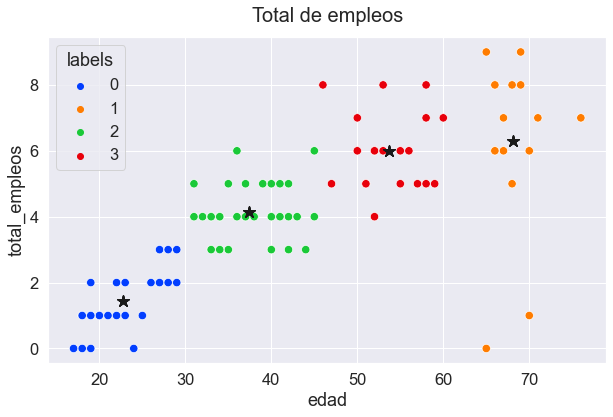

In [10]:
plt.figure(figsize=(10,6))

for i in range(len(KM.cluster_centers_)):
    for j in range(len(KM.cluster_centers_[i])):
        plt.plot(KM.cluster_centers_[i][0],KM.cluster_centers_[i][4], 'k*', markersize=12)

sns.scatterplot(data=df, x='edad', y='total_empleos', hue='labels', palette='bright', s=70)

plt.title("Total de empleos", fontdict={'fontsize': 20}, pad=15)
plt.show();

Gráfica 2 (grupos + centroides):

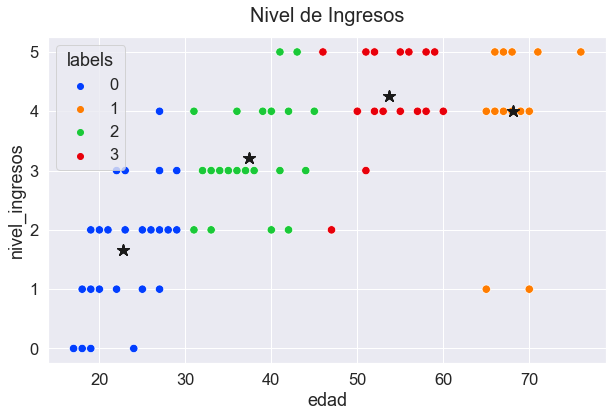

In [11]:
plt.figure(figsize=(10,6))

for i in range(len(KM.cluster_centers_)):
    for j in range(len(KM.cluster_centers_[i])):
        plt.plot(KM.cluster_centers_[i][0],KM.cluster_centers_[i][2], 'k*', markersize=12)
    
sns.scatterplot(data=df, x='edad', y='nivel_ingresos', hue='labels', palette='bright', s=70)

plt.title("Nivel de Ingresos", fontdict={'fontsize': 20}, pad=15)
plt.show();